In [806]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.4f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [807]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [808]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [809]:
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [810]:
df = df.drop_duplicates(subset=(['Codigo']))

# Tratamento de dados

### Alterando tipo de dados

In [811]:
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [812]:
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [813]:
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [814]:
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro','CEP', 'Município', 'Codigo','Tipo'] , axis=1, inplace=True)

In [815]:
df = df[df['Banheiros'] >0]
df = df[df['Quartos'] >0]

### Análise e remoção de outliers

In [816]:
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

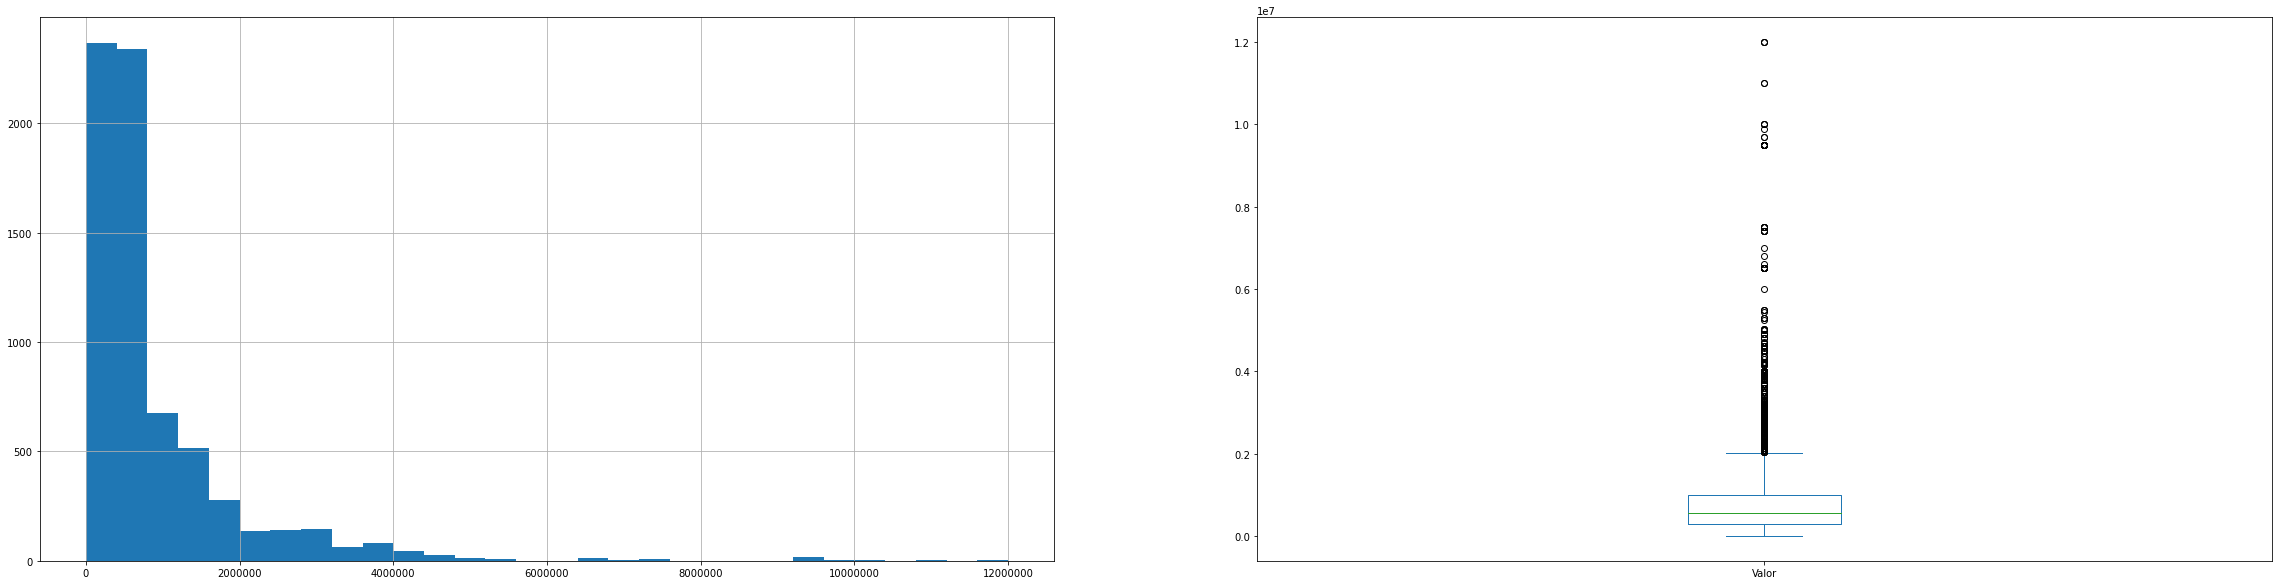

In [817]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

In [818]:
fncCalculaLimites(np.log2(df[df['Valor']>0]['Valor']))

(22.73632578144708, 15.375346193339947)

<AxesSubplot:>

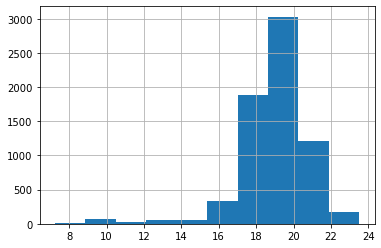

In [819]:
np.log2(df[df['Valor']>0]['Valor']).hist()

In [820]:
df[df['Valor']<=16500]

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area
92,"9,000.0000",Casas,5,5,1,Praia do Canto,194.0000
130,0.0000,Casas,2,2,2,Centro,NaN
218,"5,000.0000",Casas,2,2,0,São Pedro,NaN
270,"6,000.0000",Casas,3,2,2,Joana D'arc,250.0000
271,"5,000.0000",Casas,2,1,1,São Pedro,200.0000
...,...,...,...,...,...,...,...
6778,300.0000,Apartamentos,3,3,1,Centro,150.0000
6823,"1,250.0000",Apartamentos,1,1,0,Centro,80.0000
6950,800.0000,Apartamentos,4,3,2,Jardim Camburi,NaN
7080,0.0000,Apartamentos,3,2,2,Santa Lúcia,0.0000


In [821]:
df = df[df['Valor']>30000]

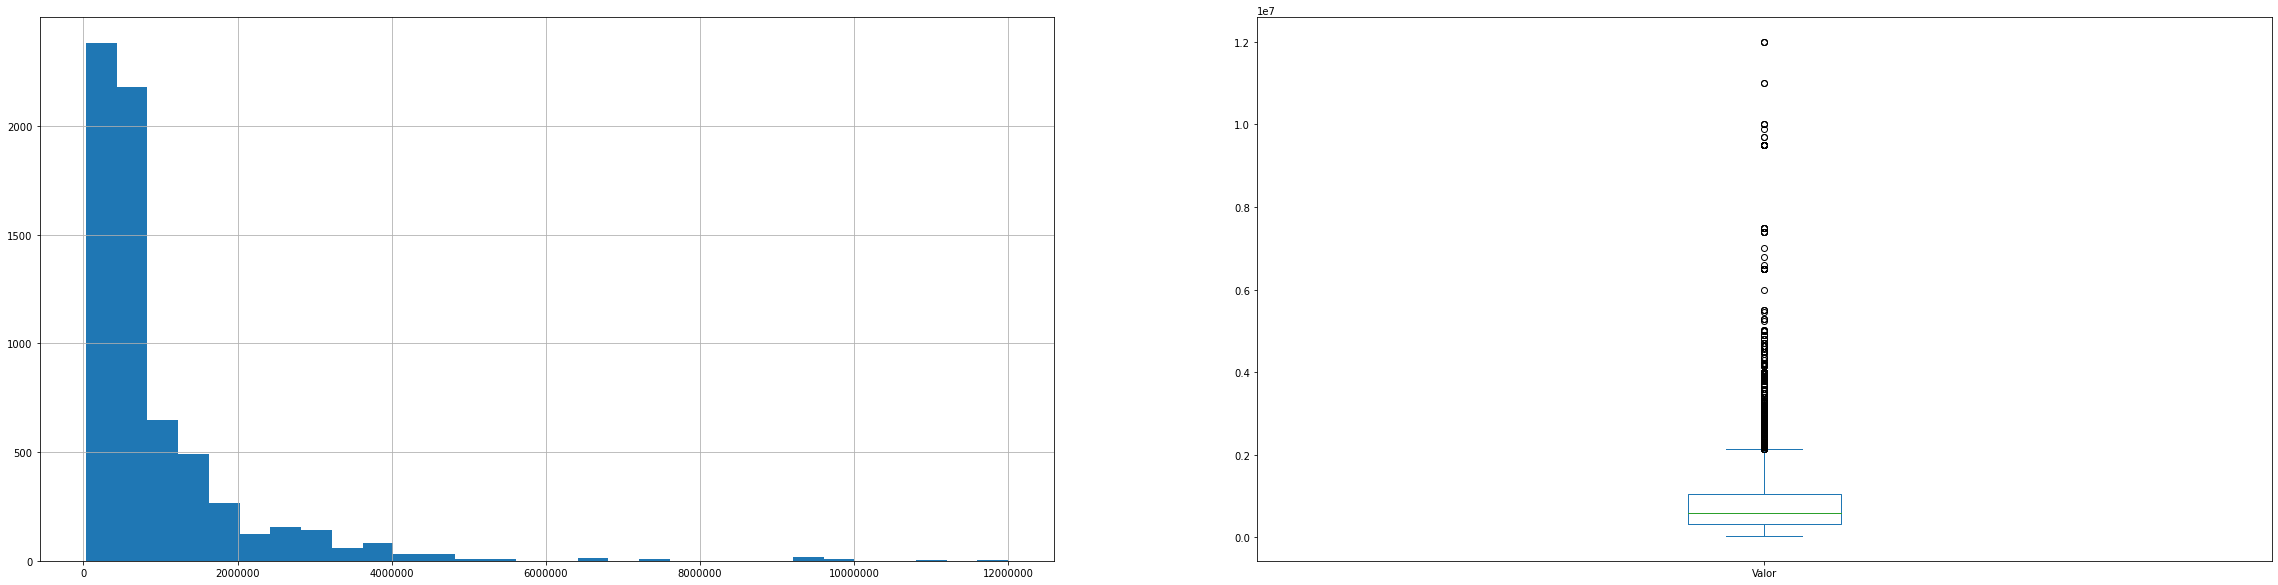

In [822]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

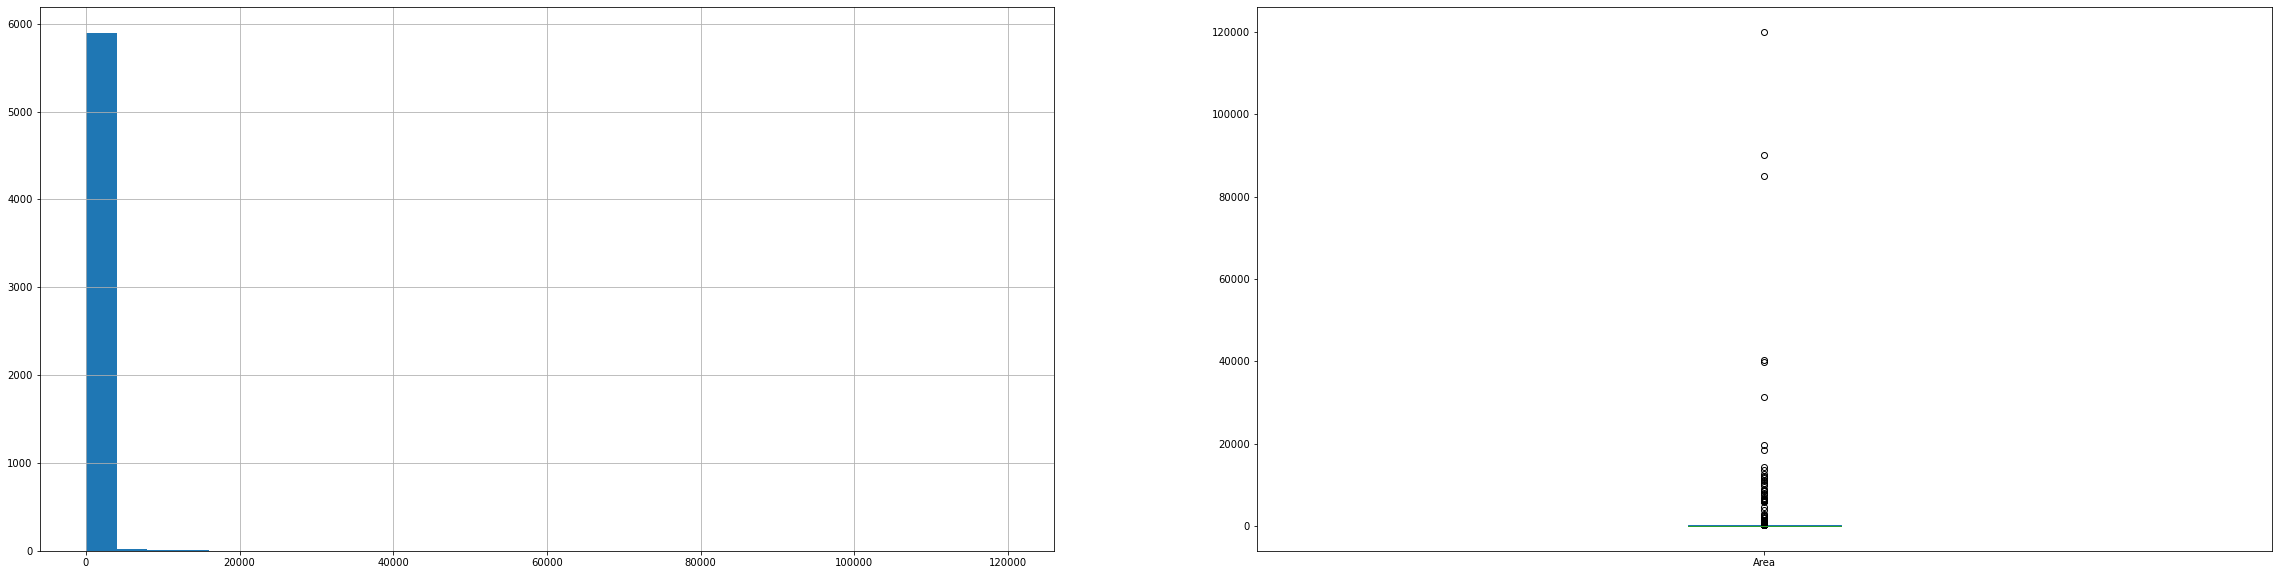

In [823]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [824]:
# Temos 341 itens com area 0 e podemos considerar erros de preenchimento
df[df['Area']==0]

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area
1,"400,000.0000",Casas,3,2,2,Goiabeiras,0.0000
20,"265,000.0000",Casas,2,2,1,Jucutuquara,0.0000
39,"250,000.0000",Casas,3,2,2,Gurigica,0.0000
52,"190,000.0000",Casas,3,4,2,Jucutuquara,0.0000
76,"270,000.0000",Casas,3,2,1,Goiabeiras,0.0000
...,...,...,...,...,...,...,...
7296,"782,000.0000",Apartamentos,3,3,2,Santa Luíza,0.0000
7342,"779,004.0000",Apartamentos,3,2,2,Barro Vermelho,0.0000
7344,"780,010.0000",Apartamentos,3,3,2,Santa Luíza,0.0000
7375,"780,000.0000",Apartamentos,3,3,2,Santa Luíza,0.0000


In [825]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>0]

In [826]:
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

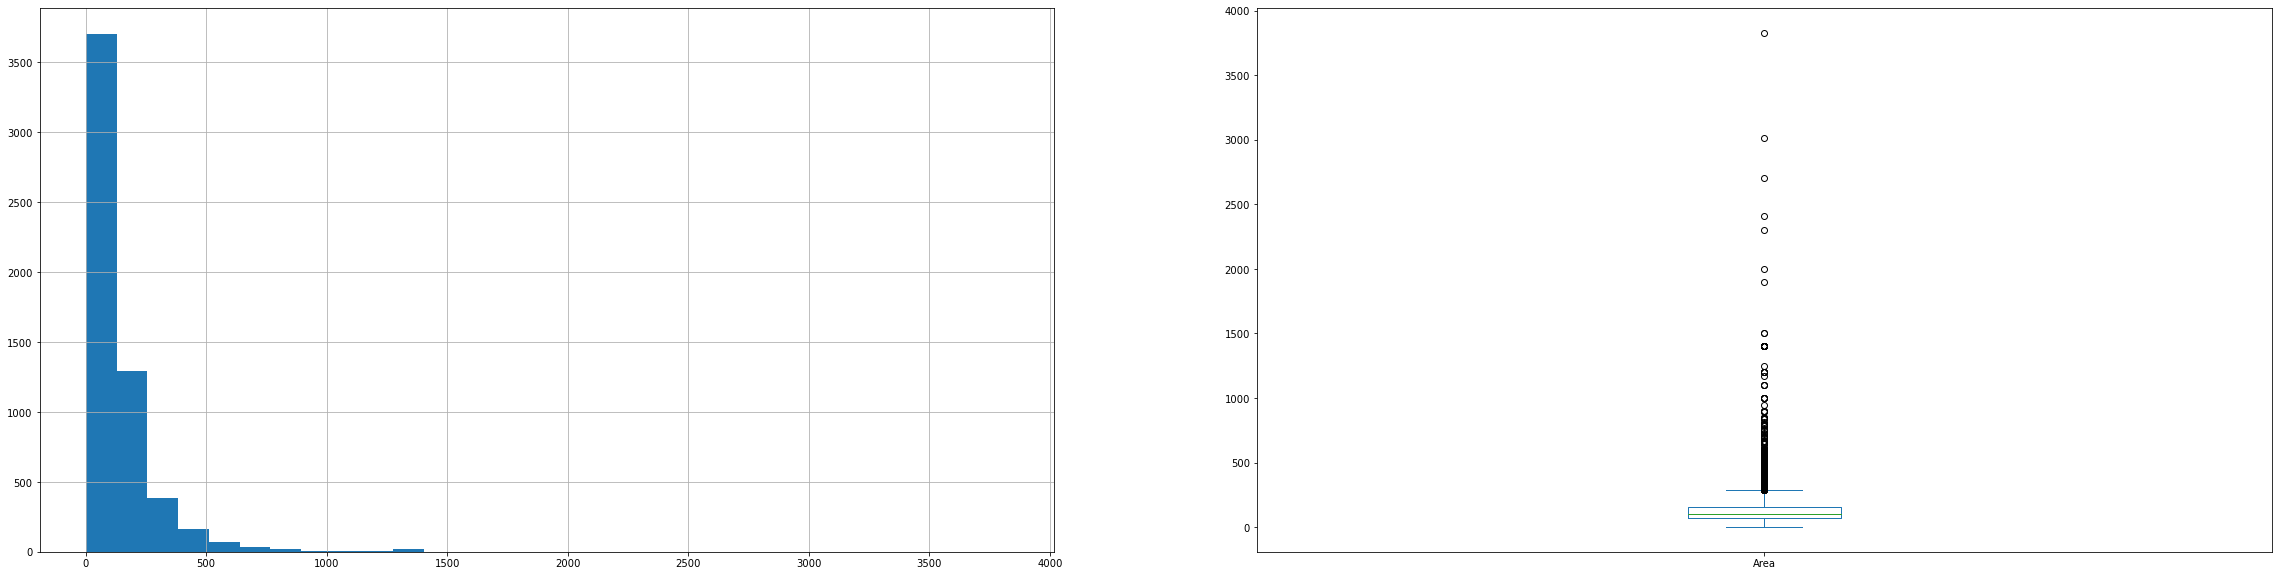

In [827]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [828]:
df['Bairro'].value_counts()

Jardim Camburi       1782
Jardim da Penha       637
Praia do Canto        542
Mata da Praia         413
Bento Ferreira        359
                     ... 
Jesus de Nazareth       1
Inhanguetá              1
Fonte Grande            1
Mário Cypreste          1
Nazareth                1
Name: Bairro, Length: 72, dtype: int64

In [829]:
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [830]:
df['Regiao'] = df['Bairro'].map(regioes)

In [831]:
df['Regiao'].value_counts()

Jardim Camburi     1783
Zona Leste         1516
Jardim da Penha    1148
Jucutuquara         512
Zona Sul            298
Maruípe             250
Zona Norte          100
Santo Antônio        56
Zona Oeste           47
Name: Regiao, dtype: int64

In [832]:
df 

,Valor,Categoria,Quartos,Banheiros,Vagas na garagem,Bairro,Area,Regiao
0,"150,000.0000",Casas,3,2,1,Itararé,110.0000,Maruípe
2,"150,000.0000",Casas,2,2,2,Itararé,125.0000,Maruípe
3,"550,000.0000",Casas,2,1,1,Santa Lúcia,100.0000,Zona Leste
4,"1,400,000.0000",Casas,4,2,2,Jardim Camburi,180.0000,Jardim Camburi
5,"400,000.0000",Casas,2,1,0,Goiabeiras,140.0000,Zona Norte
...,...,...,...,...,...,...,...,...
7395,"770,000.0000",Apartamentos,3,1,2,Jardim Camburi,90.0000,Jardim Camburi
7396,"779,000.0000",Apartamentos,3,3,2,Santa Luíza,87.0000,Zona Leste
7397,"480,000.0000",Apartamentos,2,2,2,Jardim Camburi,68.0000,Jardim Camburi
7398,"459,500.0000",Apartamentos,2,2,1,Jardim Camburi,65.0000,Jardim Camburi


In [833]:
df.corr()

,Valor,Quartos,Banheiros,Vagas na garagem,Area
Valor,1.0000,0.5718,0.6178,0.6497,0.6926
Quartos,0.5718,1.0000,0.6717,0.5623,0.5113
Banheiros,0.6178,0.6717,1.0000,0.5613,0.4787
Vagas na garagem,0.6497,0.5623,0.5613,1.0000,0.4981
Area,0.6926,0.5113,0.4787,0.4981,1.0000


# Modelagem

### Pre Processamento

In [834]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [835]:
x_train, x_test, y_train ,y_test = train_test_split(df.drop('Valor', axis=1), df['Valor'], test_size= 0.2)

#### Dummy categories

In [836]:
encoderCategoria = OneHotEncoder()

In [837]:
categories = encoderCategoria.fit_transform(x_train[['Categoria']])

In [838]:
categories = pd.DataFrame(categories.toarray(), columns = encoderCategoria.get_feature_names_out(), index = x_train.index)

In [839]:
x_train = x_train.join(categories).drop('Categoria', axis= 1)

In [840]:
encoderRegiao = OneHotEncoder()

In [841]:
regiao = encoderRegiao.fit_transform(x_train[['Regiao']])

In [842]:
regiao = pd.DataFrame(regiao.toarray(), columns= encoderRegiao.get_feature_names_out(), index= x_train.index)

In [843]:
x_train = x_train.join(regiao).drop('Regiao', axis = 1)

#### Normalizacao

In [844]:
from sklearn.preprocessing import StandardScaler

In [845]:
norm = StandardScaler()

In [846]:
x_train['Area'] = norm.fit_transform(x_train[['Area']])

### Modelo

<AxesSubplot:>

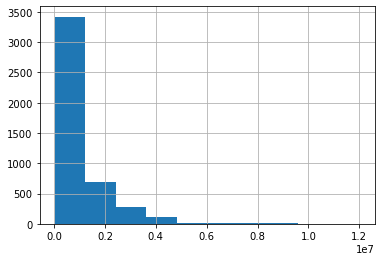

In [847]:
y_train.hist()

In [848]:
y_train = np.log2(y_train)

<AxesSubplot:>

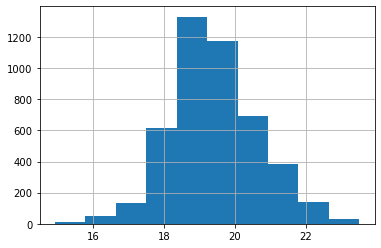

In [849]:
y_train.hist()

In [850]:
x_train = x_train.select_dtypes(include = np.number)

In [851]:
from sklearn.linear_model import LinearRegression

In [852]:
regressao = LinearRegression()

In [853]:
regressao.fit(x_train, y_train)

LinearRegression()

In [854]:
regressao.score(x_train, y_train)

0.7546100567962417

In [855]:
x_train

,Quartos,Banheiros,Vagas na garagem,Area,Categoria_Apartamentos,Categoria_Casas,Regiao_Jardim Camburi,Regiao_Jardim da Penha,Regiao_Jucutuquara,Regiao_Maruípe,Regiao_Santo Antônio,Regiao_Zona Leste,Regiao_Zona Norte,Regiao_Zona Oeste,Regiao_Zona Sul
2790,1,1,1,-0.6278,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4388,3,3,2,-0.0215,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5124,3,2,1,-0.2839,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1207,5,5,3,1.0978,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2810,2,2,1,-0.4296,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,3,2,1,-0.3130,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
6671,4,4,2,-0.1848,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6412,2,1,1,-0.4646,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4386,3,2,2,-0.3713,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


<AxesSubplot:xlabel='Valor', ylabel='Quartos'>

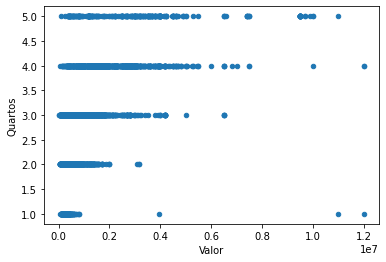

In [856]:
df.plot(kind = 'scatter' , x='Valor' , y='Quartos')

In [857]:
df.groupby('Quartos').mean()

,Valor,Banheiros,Vagas na garagem,Area
Quartos,,,,
1,"461,661.9157",1.0843,0.9382,92.2360
2,"483,789.1645",1.6373,1.1548,79.9988
3,"773,816.0511",2.2629,1.6464,125.8773
4,"1,989,197.9478",3.6011,2.6328,240.9021
5,"3,165,519.8074",4.2770,3.1757,512.0000


#### Validação

In [858]:
categories = encoderCategoria.transform(x_test[['Categoria']])

In [859]:
categories = pd.DataFrame(categories.toarray(), columns= encoderCategoria.get_feature_names_out(), index = x_test.index)

In [860]:
x_test = x_test.join(categories).drop('Categoria', axis = 1)

In [861]:
regioes = pd.DataFrame(encoderRegiao.transform(x_test[['Regiao']]).toarray() , columns = encoderRegiao.get_feature_names_out(), index =x_test.index)

In [862]:
x_test = x_test.join(regioes).drop('Regiao', axis =1)

In [863]:
x_test['Area'] = norm.transform(x_test[['Area']])

In [864]:
x_test = x_test.select_dtypes(include = np.number)
y_test = np.log2(y_test)

In [865]:
regressao.score(x_test, y_test)

0.7421469986303256

In [866]:
from sklearn.model_selection import cross_val_score

In [867]:
testes = cross_val_score(regressao , x_train, y_train, cv = 100)

In [868]:
testes.mean()

0.7400110029689921